<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/Bu%E1%BB%95i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ce117e0c0390f91ca9ea41e0fc3cf2d411ced0fe2d08efa957f3b4b3afc1352d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x=np.arange(11)
mfx=fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

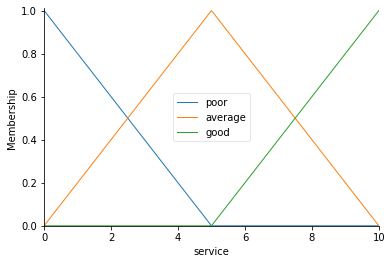

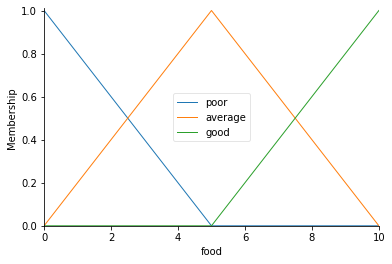

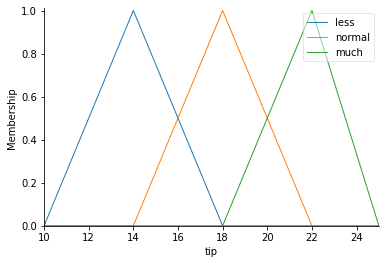

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
service.view()
food.view()
tip.view()

19.03051031487514


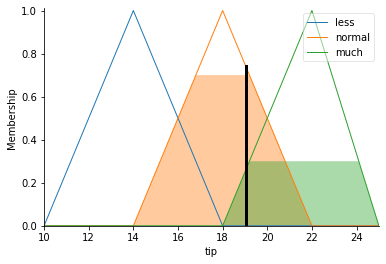

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')#đầu vào
tip = ctrl.Consequent(np.arange(10,26,1),'tip')#đầu ra
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['normal'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule7 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule8 = ctrl.Rule(food['good'] & service['poor'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

#service.view() #food['average'].view() trích xuất từng thành phần 
#food.view()
#tip.view()

49.99999999999999


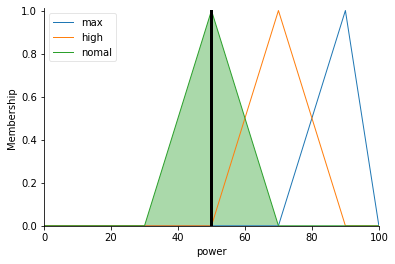

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,121,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')
time['veryfast']=fuzz.trimf(time.universe,[10,10,37.5])
time['fast']=fuzz.trimf(time.universe,[10,37.5,65])
time['nomal']=fuzz.trimf(time.universe,[37.5,65,92.5])
time['slow']=fuzz.trimf(time.universe,[65,92.5,120])
time['veryslow']=fuzz.trimf(time.universe,[92.5,120,120])
rice['veryless']=fuzz.trimf(rice.universe,[100,100,325])
rice['less']=fuzz.trimf(rice.universe,[100,325,550])
rice['nomal']=fuzz.trimf(rice.universe,[325,550,775])
rice['much']=fuzz.trimf(rice.universe,[550,775,1000])
rice['verymuch']=fuzz.trimf(rice.universe,[775,1000,1000])
power['max']=fuzz.trimf(power.universe,[70,90,100])
power['high']=fuzz.trimf(power.universe,[50,70,90])
power['nomal']=fuzz.trimf(power.universe,[30,50,70])
rule1=ctrl.Rule(time['veryfast'] & rice['veryless'],power['nomal'])
rule2=ctrl.Rule(time['veryfast'] & rice['less'],power['nomal'])
rule3=ctrl.Rule(time['veryfast'] & rice['nomal'],power['high'])
rule4=ctrl.Rule(time['veryfast'] & rice['much'],power['max'])
rule5=ctrl.Rule(time['veryfast'] & rice['verymuch'],power['max'])
rule6=ctrl.Rule(time['fast'] & rice['veryless'],power['nomal'])
rule7=ctrl.Rule(time['fast'] & rice['less'],power['high'])
rule8=ctrl.Rule(time['fast'] & rice['nomal'],power['high'])
rule9=ctrl.Rule(time['fast'] & rice['much'],power['max'])
rule10=ctrl.Rule(time['fast'] & rice['verymuch'],power['max'])
rule11=ctrl.Rule(time['nomal'] & rice['veryless'],power['nomal'])
rule12=ctrl.Rule(time['nomal'] & rice['less'],power['nomal'])
rule13=ctrl.Rule(time['nomal'] & rice['nomal'],power['nomal'])
rule14=ctrl.Rule(time['nomal'] & rice['much'],power['high'])
rule15=ctrl.Rule(time['nomal'] & rice['verymuch'],power['high'])
rule16=ctrl.Rule(time['slow'] & rice['veryless'],power['nomal'])
rule17=ctrl.Rule(time['slow'] & rice['less'],power['nomal'])
rule18=ctrl.Rule(time['slow'] & rice['nomal'],power['high'])
rule19=ctrl.Rule(time['slow'] & rice['much'],power['high'])
rule20=ctrl.Rule(time['slow'] & rice['verymuch'],power['high'])
rule21=ctrl.Rule(time['veryslow'] & rice['veryless'],power['nomal'])
rule22=ctrl.Rule(time['veryslow'] & rice['less'],power['nomal'])
rule23=ctrl.Rule(time['veryslow'] & rice['nomal'],power['nomal'])
rule24=ctrl.Rule(time['veryslow'] & rice['much'],power['high'])
rule25=ctrl.Rule(time['veryslow'] & rice['verymuch'],power['max'])
cooking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
cooking=ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['rice']=100
cooking.input['time']=10
cooking.compute()
print(cooking.output["power"])
power.view(sim=cooking)